In [ ]:
# Завантаження потрібних бібліотек
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Імпорт відповідних бібліотек
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# === 1. Налаштування ===
# Параметри
HOME = os.getcwd() # Домашня директорія
API_KEY = "US6GFXKmmIauPoD8GLi5" # API-ключ
WORKSPACE_NAME = "dekkan-neural-network-workspace" # Назва робочої області (Dekkan neural network workspace)
PROJECT_NAME = "cats_detection-yjccj" # Ім'я проєкту (Cats_detection)
DATASET_VERSION = 1 # Версія датасету
DATA_FORMAT = "yolov11" # Формат даних датасету
MODEL_PATH = f"{HOME}/models/yolo11m.pt" # Шлях до завантаженої моделі
TRAIN_EPOCHS = 25 # Кількість епох
IMG_SIZE = 640 # Розмір зображень

In [ ]:
# === 2. Завантаження датасету ===
def download_dataset():
    print("Завантаження датасету...")
    rf = Roboflow(api_key=API_KEY)
    project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
    version = project.version(DATASET_VERSION)
    dataset = version.download(DATA_FORMAT)
    print(f"Датасет завантажено до: {dataset.location}")
    return dataset

In [ ]:
# === 3. Тренування моделі ===
def train_model(dataset):
    print("Тренування моделі...")
    model = YOLO(MODEL_PATH)  # Завантаження предтренованої моделі

    print("Пристрій, що використовується:", model.device)
    model.train(
        data = f"{dataset.location}/data.yaml",
        epochs = TRAIN_EPOCHS,
        imgsz = IMG_SIZE,
        plots = True,
        save = True,
        project = 'runs/detect',  # Стандартний шлях
        name = 'train_result',  # Ім'я підкаталогу
        batch = 16,
    )
    print("Тренування завершено.")
    return model

In [ ]:
# === 4. Основний блок ===
if __name__ == "__main__":
    # Завантаження датасету
    dataset = download_dataset()

    # Тренування моделі
    model = train_model(dataset)

    # Отримання шляху до останньої тренувальної сесії
    runs_path = "runs/detect"
    latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)
    print(f"Останній запуск збережено в: {latest_run}")

    print("Все завершено успішно.")

Завантаження датасету...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cats_detection-1 in yolov11:: 100%|██████████| 33458/33458 [00:04<00:00, 6944.44it/s]


Датасет завантажено до: /content/Cats_detection-1
Тренування моделі...


100%|██████████| 38.8M/38.8M [00:01<00:00, 31.4MB/s]


Пристрій, що використовується: cpu
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/models/yolo11m.pt, data=/content/Cats_detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train_result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 379MB/s]


AMP: checks passed ✅


train: Scanning /content/Cats_detection-1/train/labels... 14634 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14634/14634 [00:10<00:00, 1439.30it/s]


train: New cache created: /content/Cats_detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Cats_detection-1/valid/labels... 1393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1393/1393 [00:01<00:00, 1151.18it/s]

val: New cache created: /content/Cats_detection-1/valid/labels.cache


Plotting labels to runs/detect/train_result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train_result
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      8.75G     0.6795      2.285       1.36         31        640: 100%|██████████| 915/915 [02:30<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.09it/s]


                   all       1393       1440      0.337      0.424      0.311       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.73G     0.7004       1.82      1.363         29        640: 100%|██████████| 915/915 [02:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.19it/s]

                   all       1393       1440      0.466      0.546      0.514      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      8.73G     0.6988      1.758      1.357         33        640: 100%|██████████| 915/915 [02:17<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.26it/s]

                   all       1393       1440      0.549      0.625      0.635      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      8.71G     0.6626      1.666      1.331         32        640: 100%|██████████| 915/915 [02:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.23it/s]

                   all       1393       1440       0.58      0.636      0.657      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      8.73G     0.6335      1.574      1.306         30        640: 100%|██████████| 915/915 [02:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all       1393       1440      0.623      0.697       0.72      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      8.69G     0.6005      1.486      1.279         30        640: 100%|██████████| 915/915 [02:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.21it/s]

                   all       1393       1440      0.734      0.718      0.787      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      8.74G      0.582      1.411      1.261         29        640: 100%|██████████| 915/915 [02:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.20it/s]

                   all       1393       1440      0.697      0.738      0.782      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.71G     0.5627      1.359      1.246         32        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.719      0.728      0.792      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      8.73G     0.5483      1.309      1.236         32        640: 100%|██████████| 915/915 [02:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all       1393       1440      0.763      0.774      0.828      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      8.76G     0.5369      1.271      1.225         22        640: 100%|██████████| 915/915 [02:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.28it/s]

                   all       1393       1440      0.774      0.807      0.859      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.72G      0.527      1.223      1.221         30        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all       1393       1440       0.78      0.816      0.877      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       8.7G     0.5143      1.179      1.207         29        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.29it/s]

                   all       1393       1440      0.806      0.831      0.887      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.73G        0.5      1.137      1.194         31        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.24it/s]

                   all       1393       1440      0.864      0.807      0.898      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.69G     0.4983      1.115      1.192         28        640: 100%|██████████| 915/915 [02:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.833      0.847      0.905      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      8.73G     0.4864      1.076      1.186         31        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.24it/s]

                   all       1393       1440       0.89      0.829      0.916      0.804


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      8.69G     0.3791     0.6236      1.196         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.25it/s]

                   all       1393       1440      0.845       0.85      0.908      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      8.72G     0.3592     0.5573      1.176         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.25it/s]

                   all       1393       1440      0.867      0.853      0.913      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      8.75G      0.342     0.5018      1.156         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.21it/s]

                   all       1393       1440      0.889      0.861      0.923      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      8.72G     0.3292     0.4617      1.145         11        640: 100%|██████████| 915/915 [02:14<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.855      0.871      0.918      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       8.7G     0.3156     0.4186       1.13         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all       1393       1440      0.867      0.868      0.924      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.72G     0.3049     0.3773      1.119         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.21it/s]

                   all       1393       1440      0.893      0.852       0.93      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      8.68G     0.2887     0.3389      1.098         10        640: 100%|██████████| 915/915 [02:14<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.873      0.881      0.929      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      8.72G     0.2765       0.31      1.089         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.33it/s]

                   all       1393       1440      0.867      0.878      0.929      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      8.69G     0.2676     0.2866      1.078         13        640: 100%|██████████| 915/915 [02:14<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.904      0.855      0.933      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      8.72G     0.2548     0.2566      1.068         10        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.855      0.899      0.933       0.88



25 epochs completed in 1.007 hours.
Optimizer stripped from runs/detect/train_result/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train_result/weights/best.pt, 40.5MB

Validating runs/detect/train_result/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.48it/s]


                   all       1393       1440      0.855      0.899      0.933       0.88
            Abyssinian         55         55      0.883       0.96      0.958      0.907
      American Bobtail         64         65      0.788      0.831      0.875      0.855
         American Curl         44         47       0.84      0.872      0.945      0.892
                Bengal         69         70      0.712      0.847      0.903      0.813
                Birman         70         70      0.788      0.871      0.874      0.818
                Bombay         66         66      0.916      0.996      0.965      0.909
     British Shorthair         54         54      0.777      0.906      0.929      0.889
           Cornish Rex         60         61      0.878      0.967      0.954      0.918
          Egyptian Mau         51         51      0.755      0.882      0.923      0.888
            Khao Manee         42         49      0.834      0.959      0.977      0.903
                 Lyko

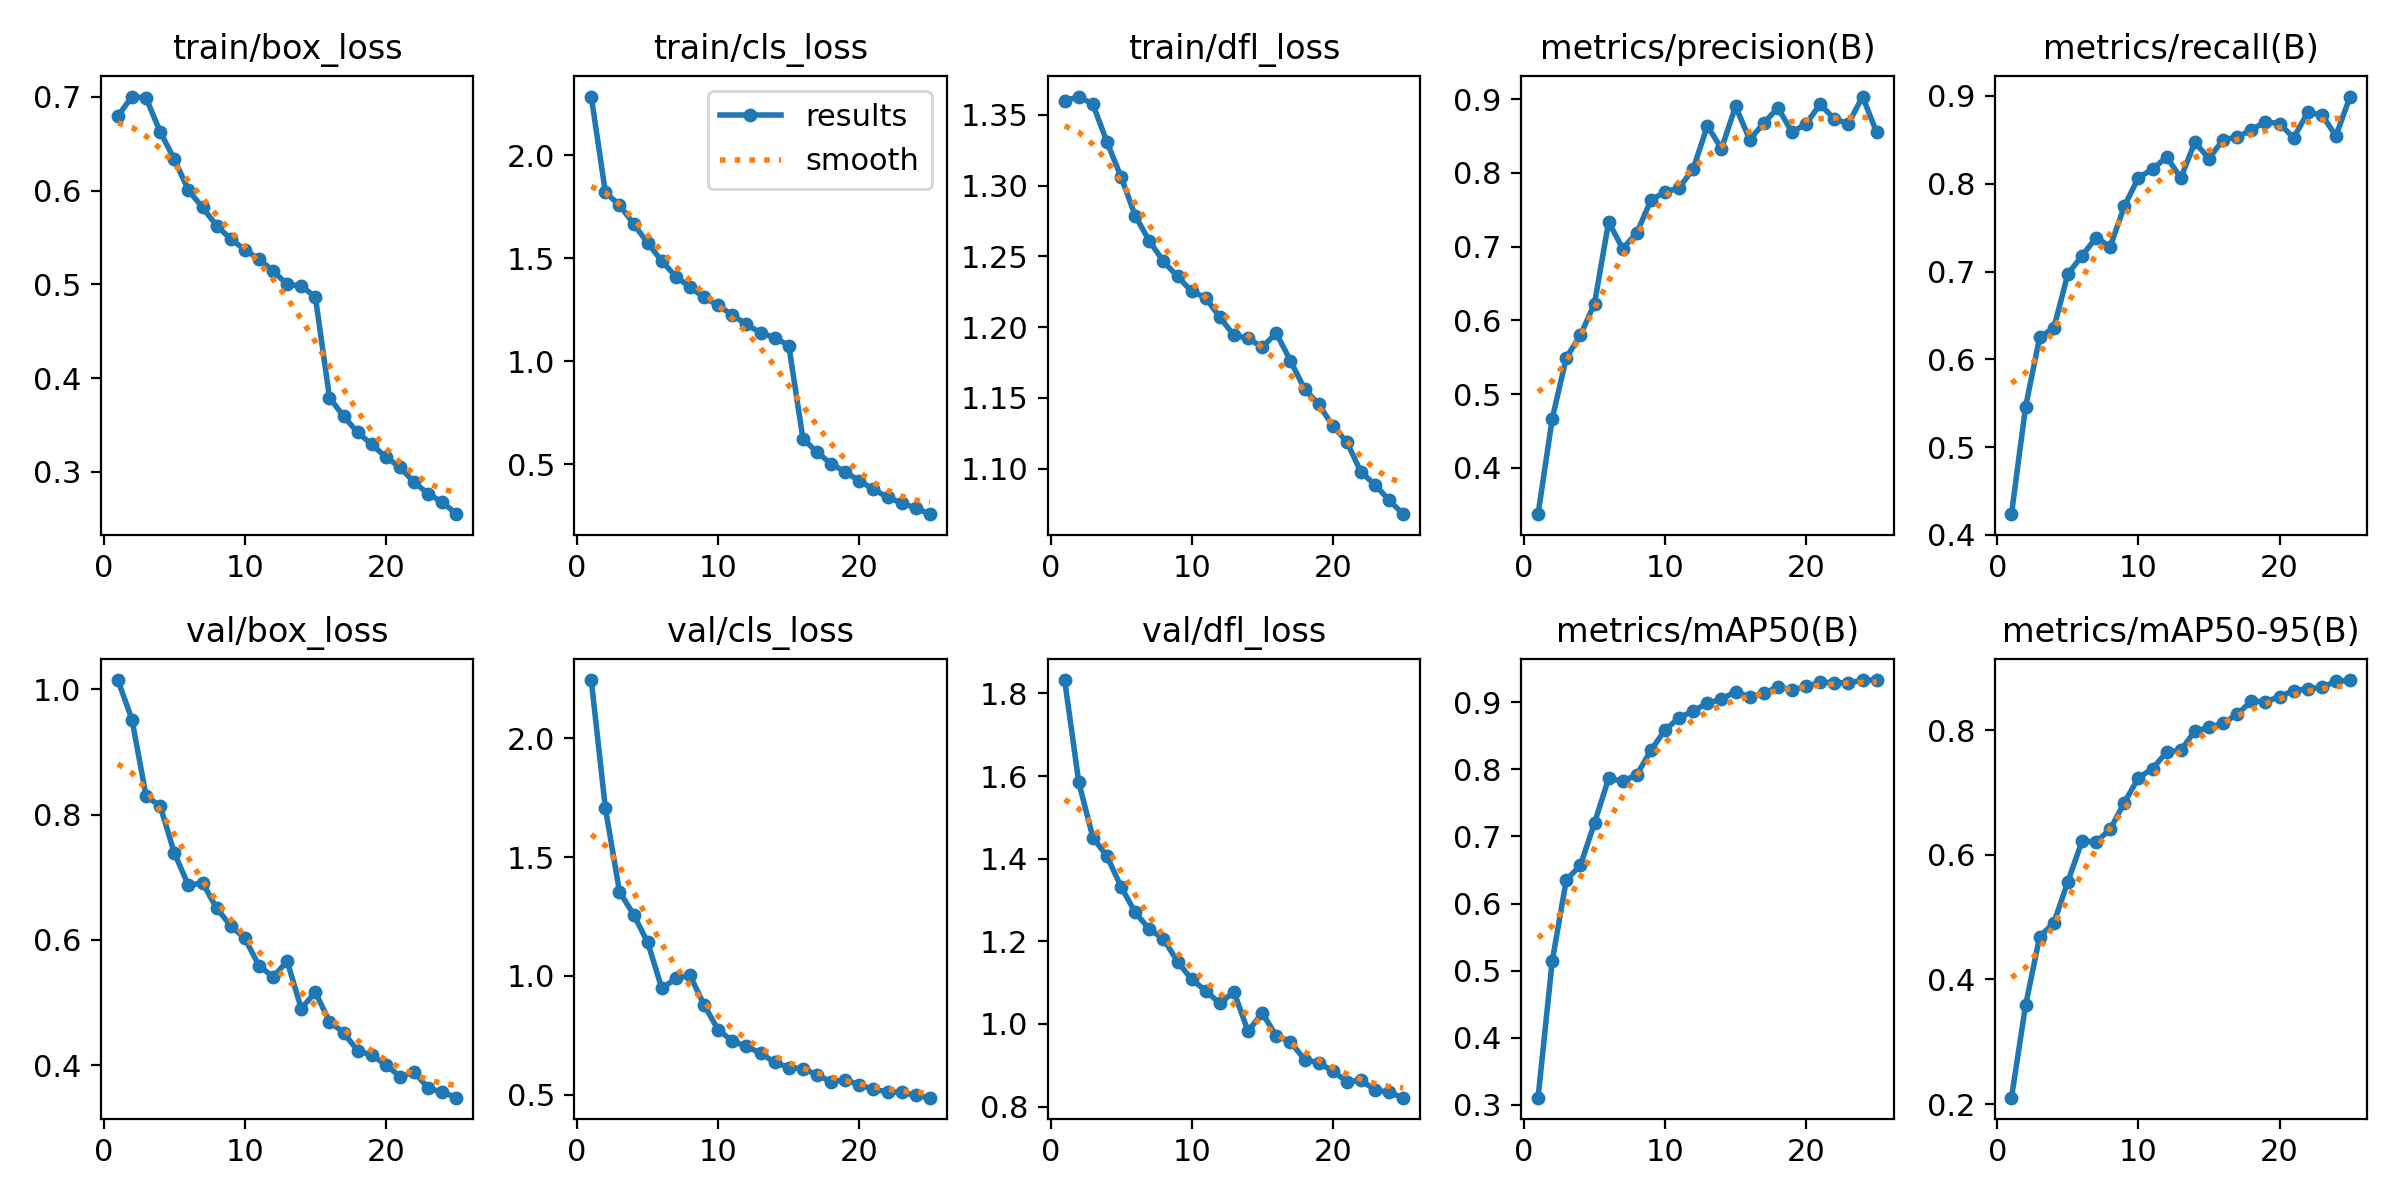

In [ ]:
# === 5. Отримання результатів навчання у вигляді графіків ===

# Загальні результати навчання
IPyImage (filename = f'/content/runs/detect/train_result/results.png', width =600)

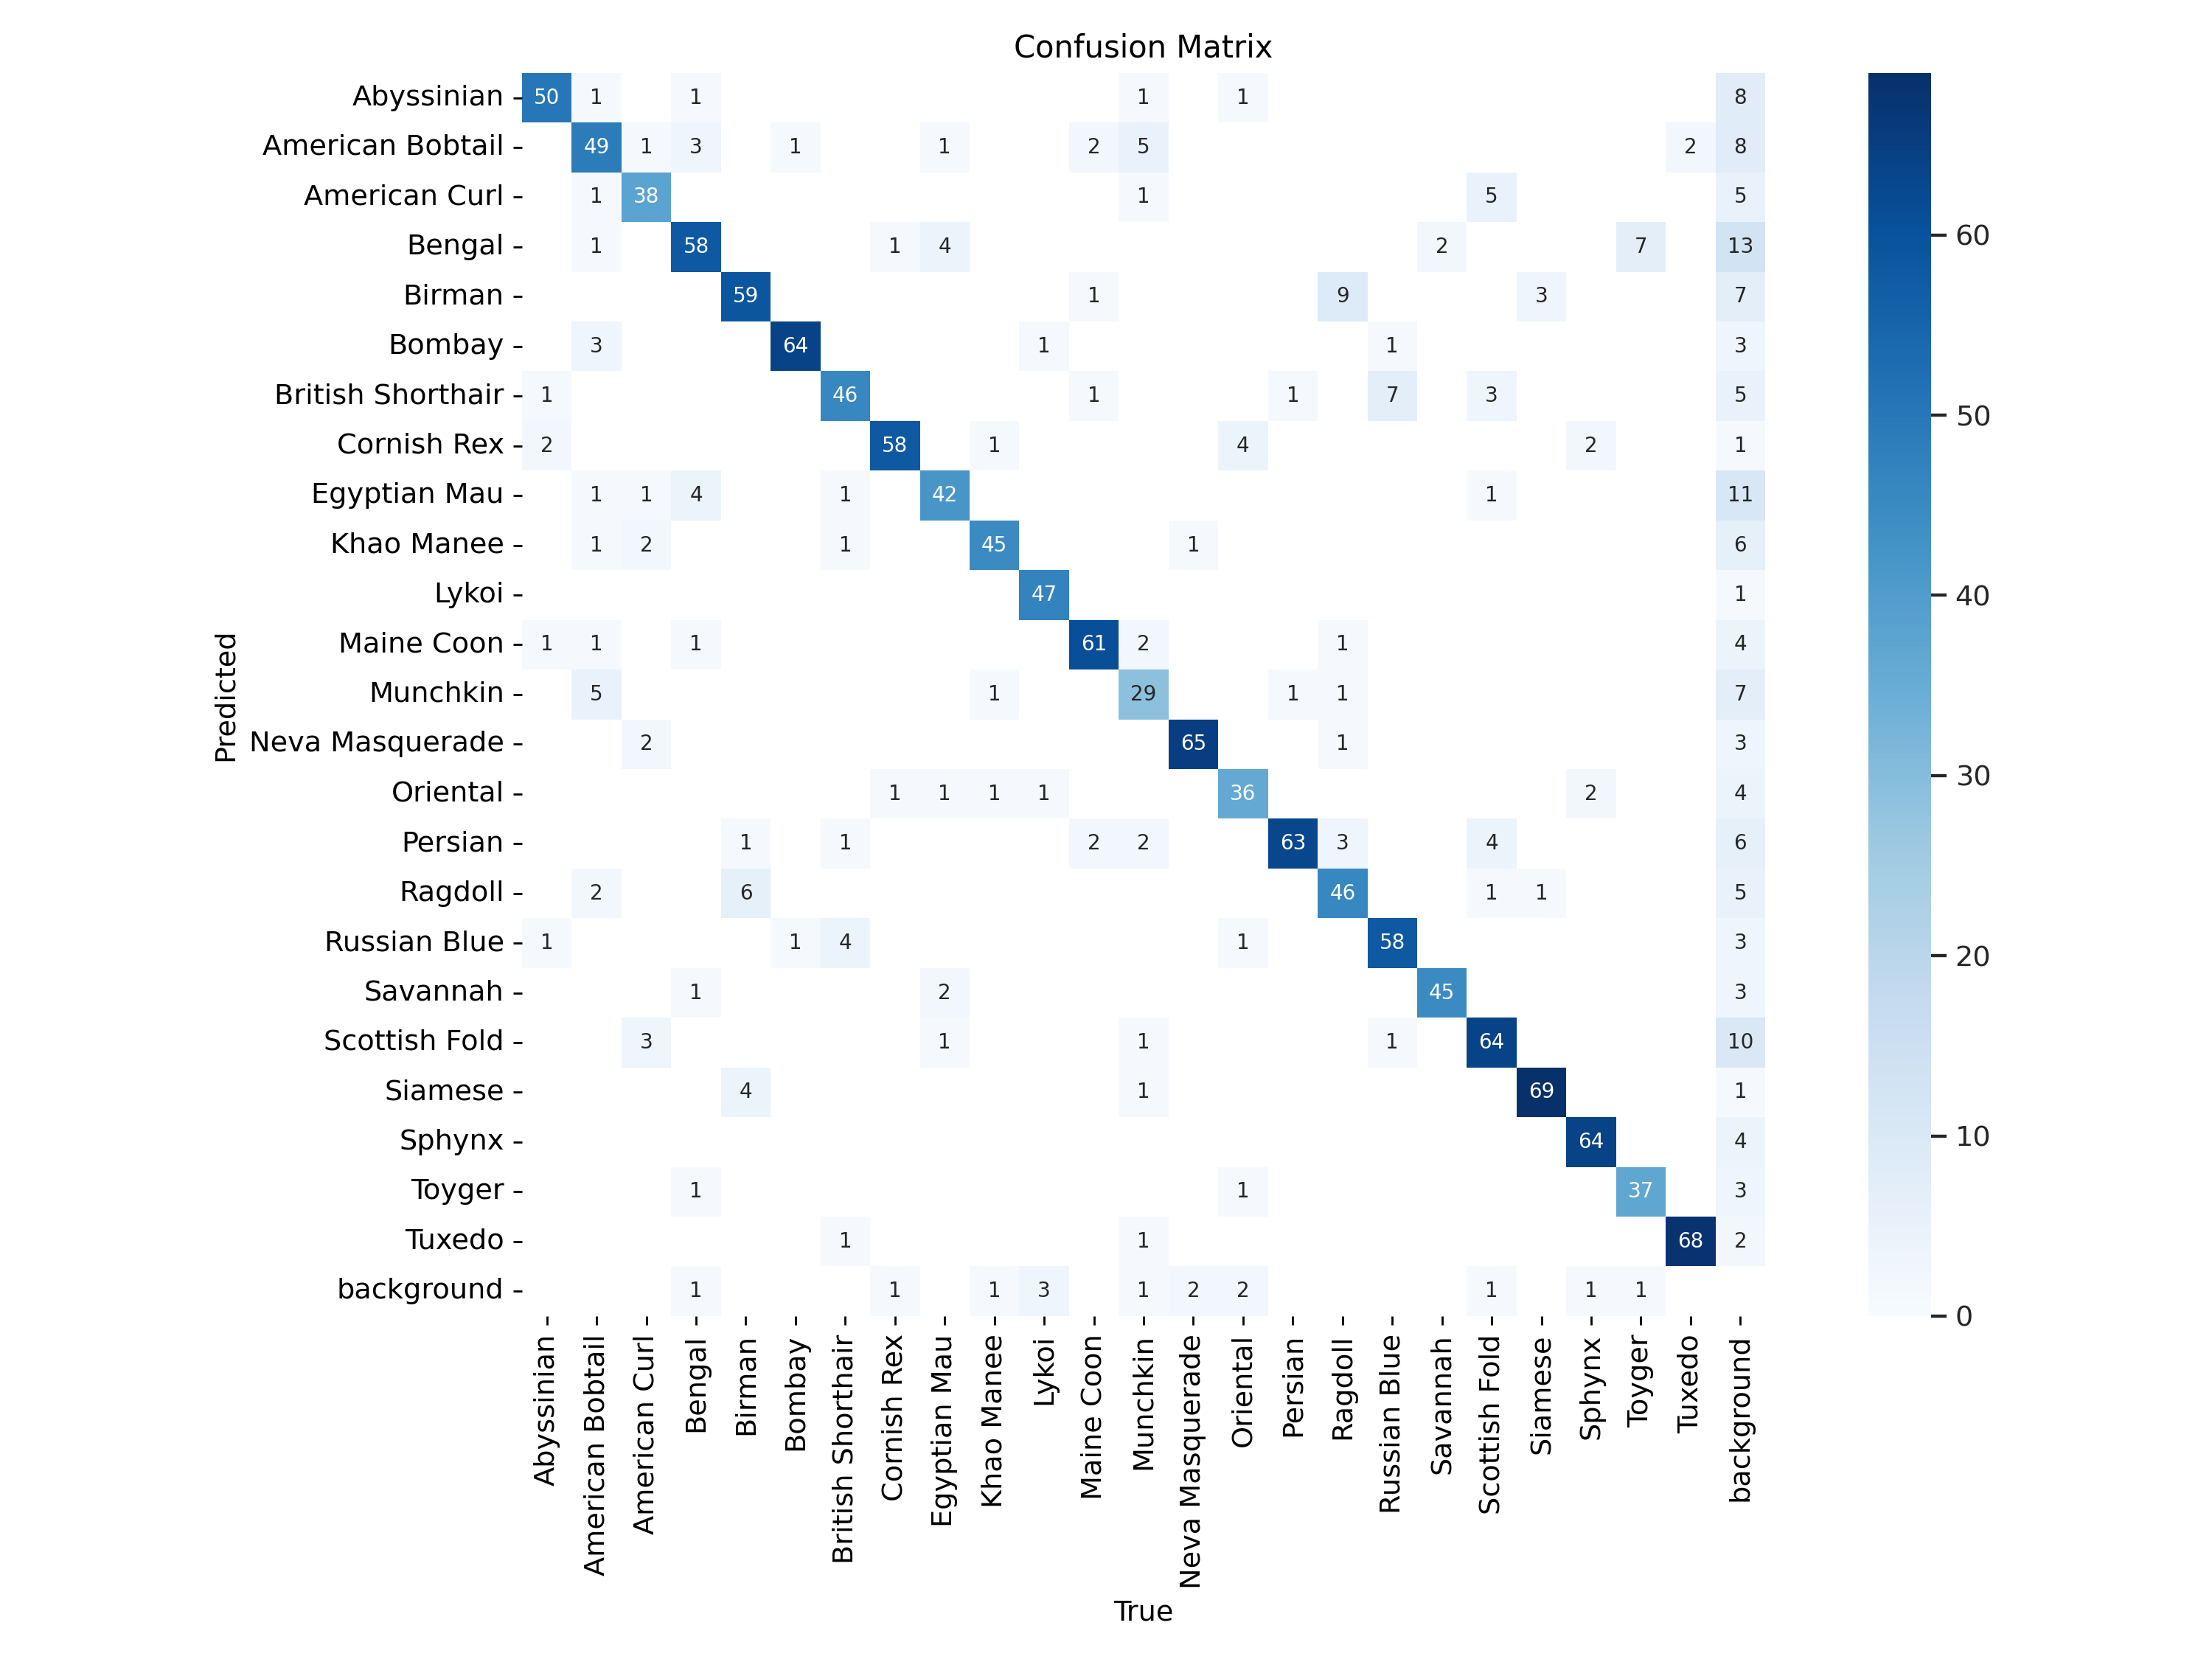

In [ ]:
# Матриця заплутаності (Confusion Matrix)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix.png', width =600)

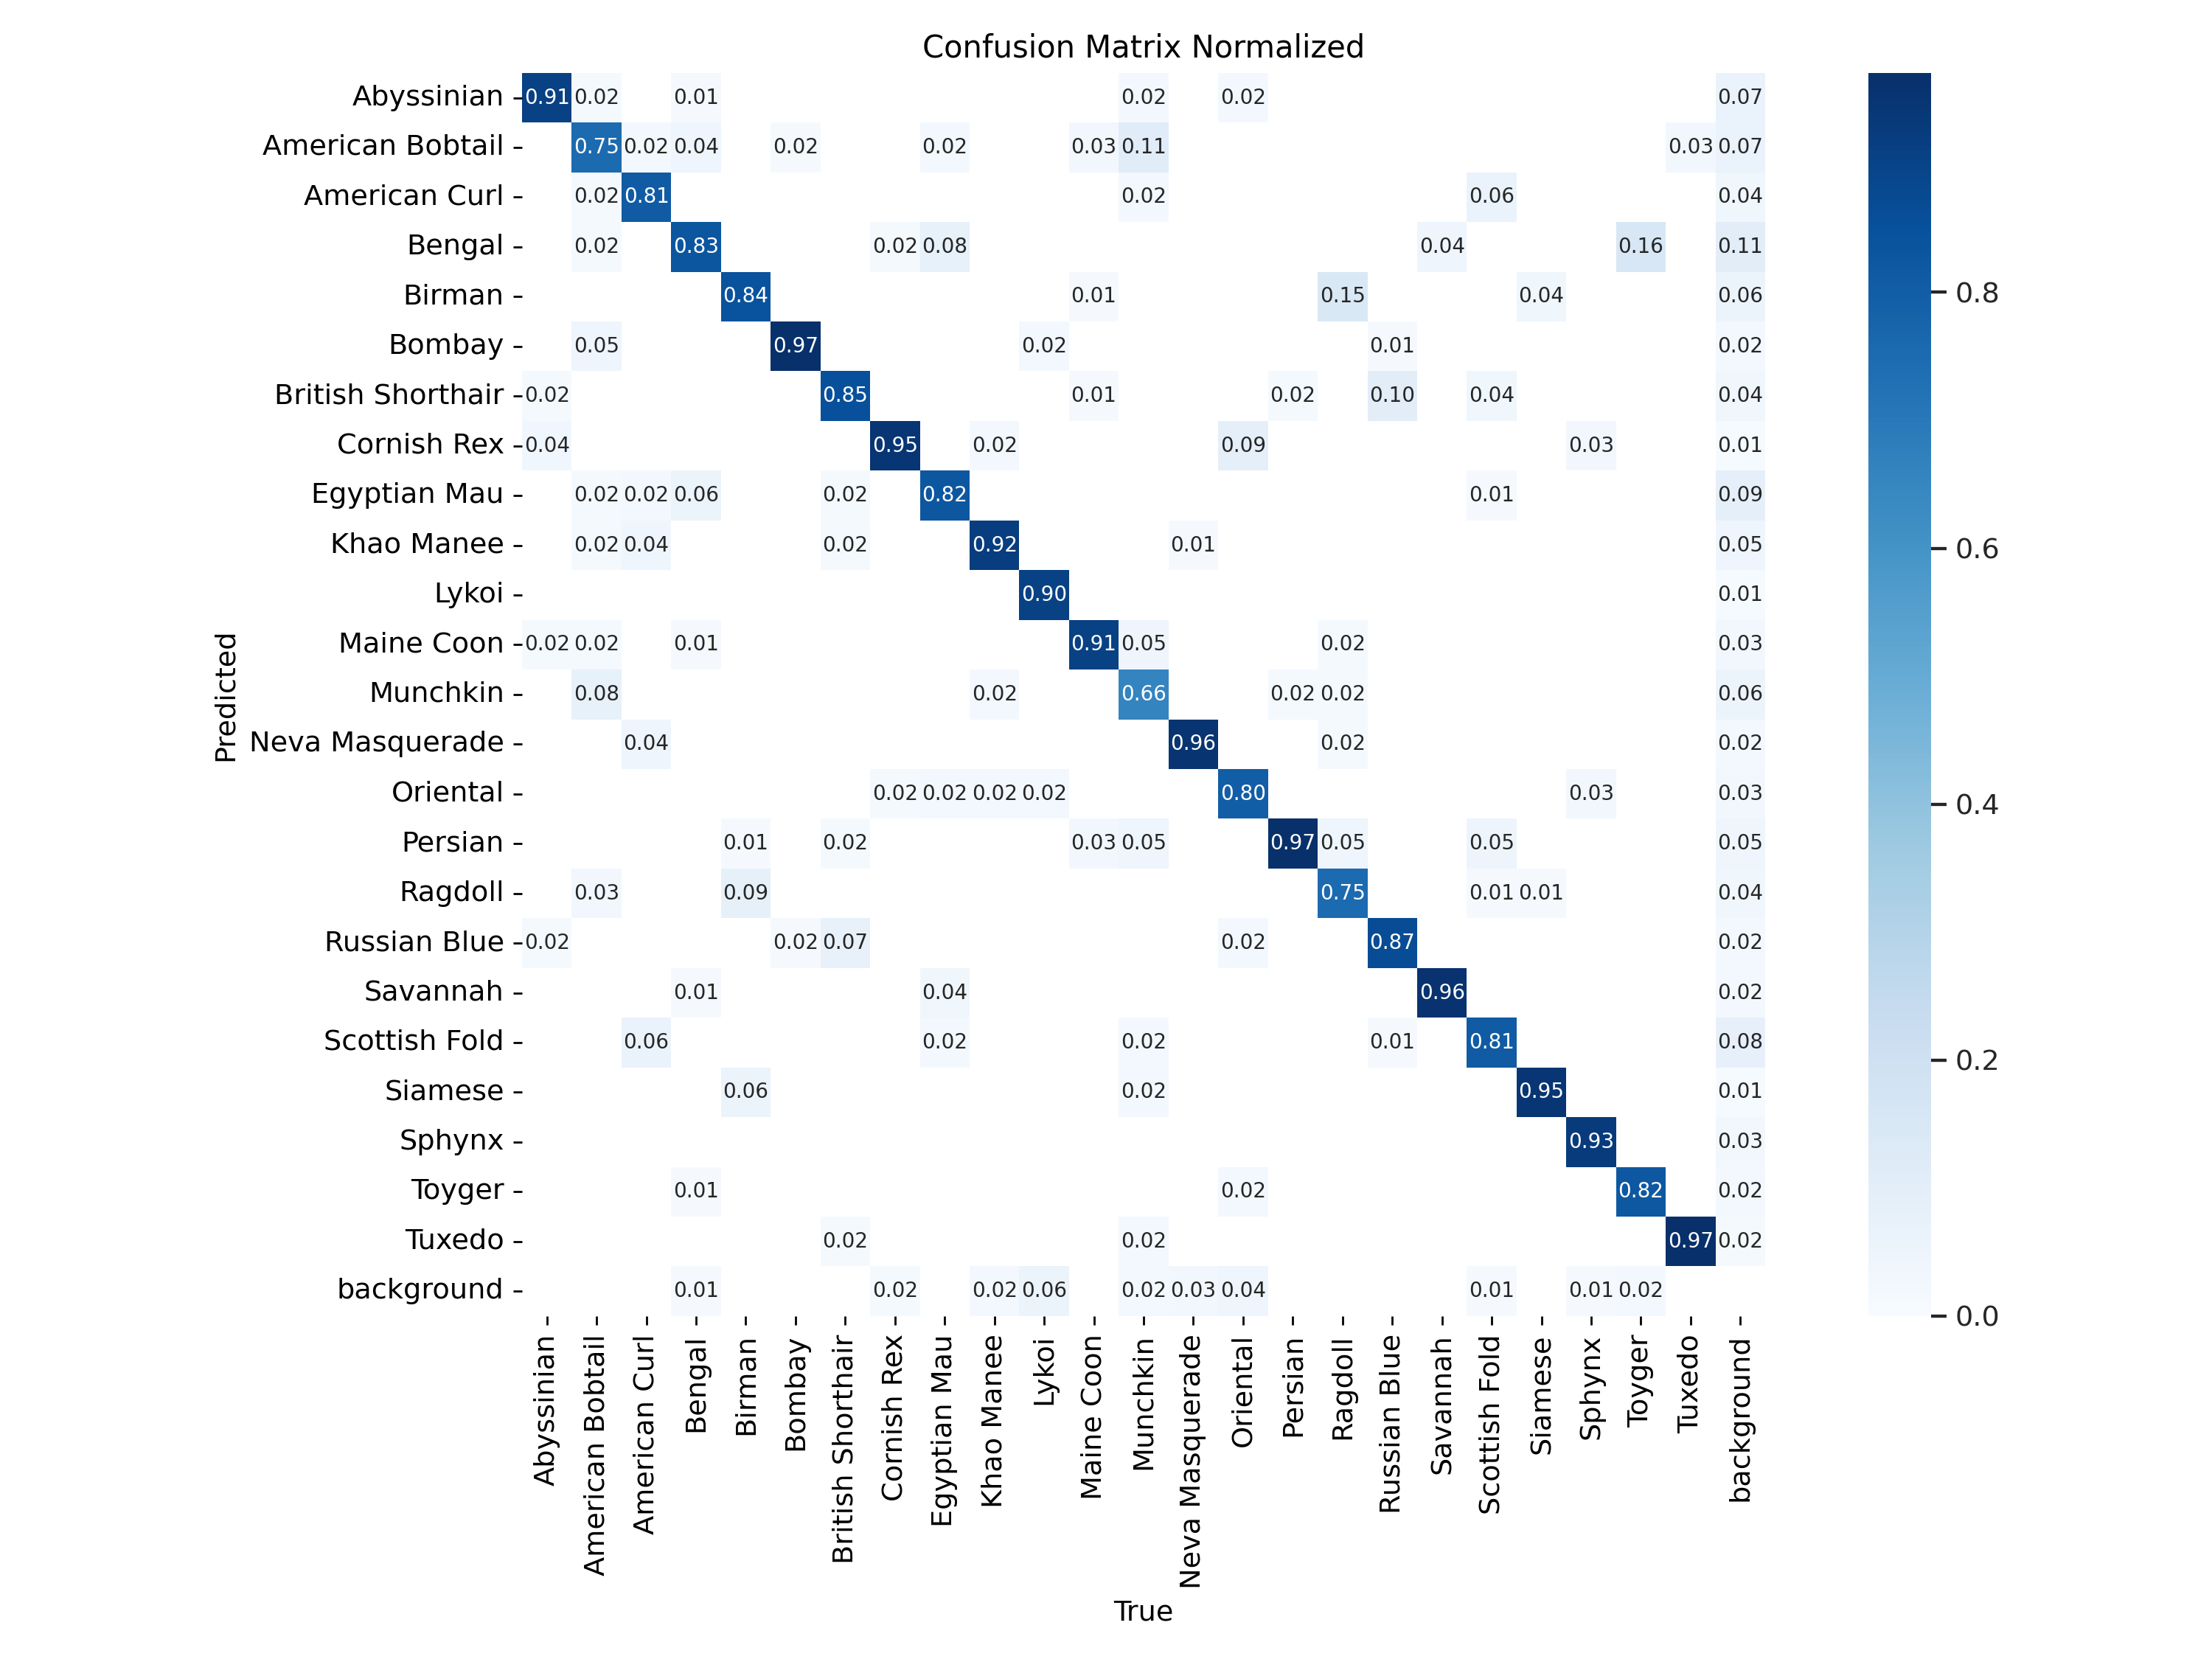

In [ ]:
# Нормалізована матриця заплутаності (Confusion Matrix Normalized)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix_normalized.png', width =600)

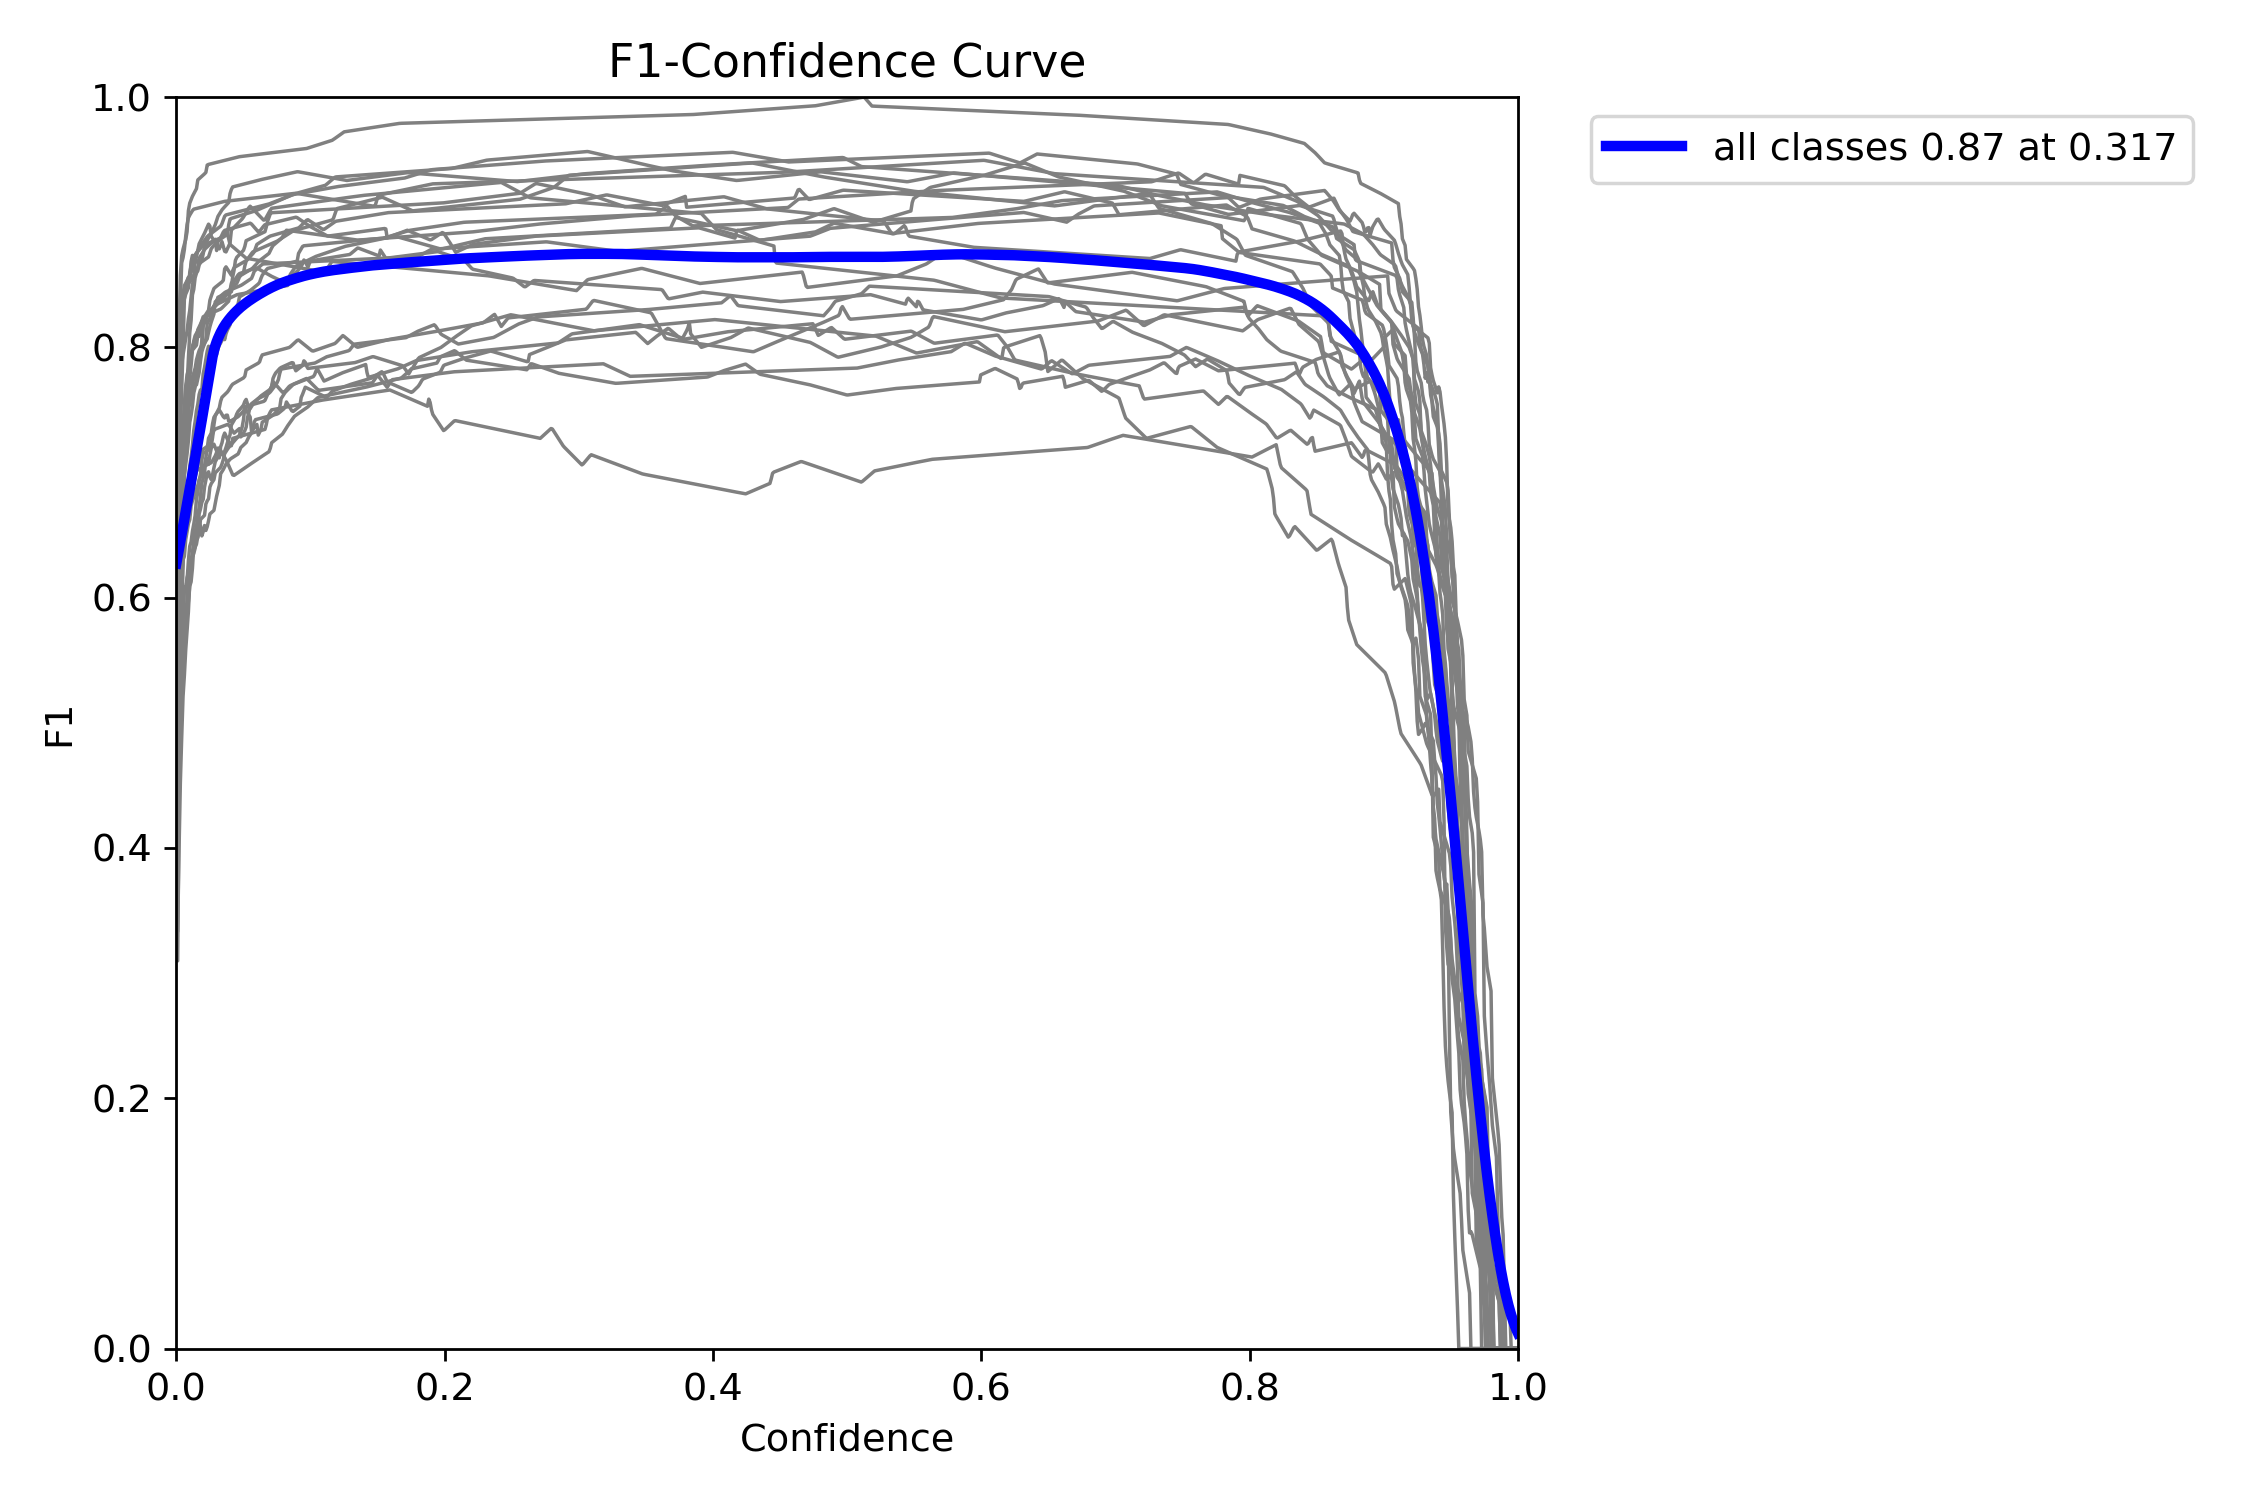

In [ ]:
# Графік залежності F1-score від рівня впевненості (F1-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/F1_curve.png', width =600)

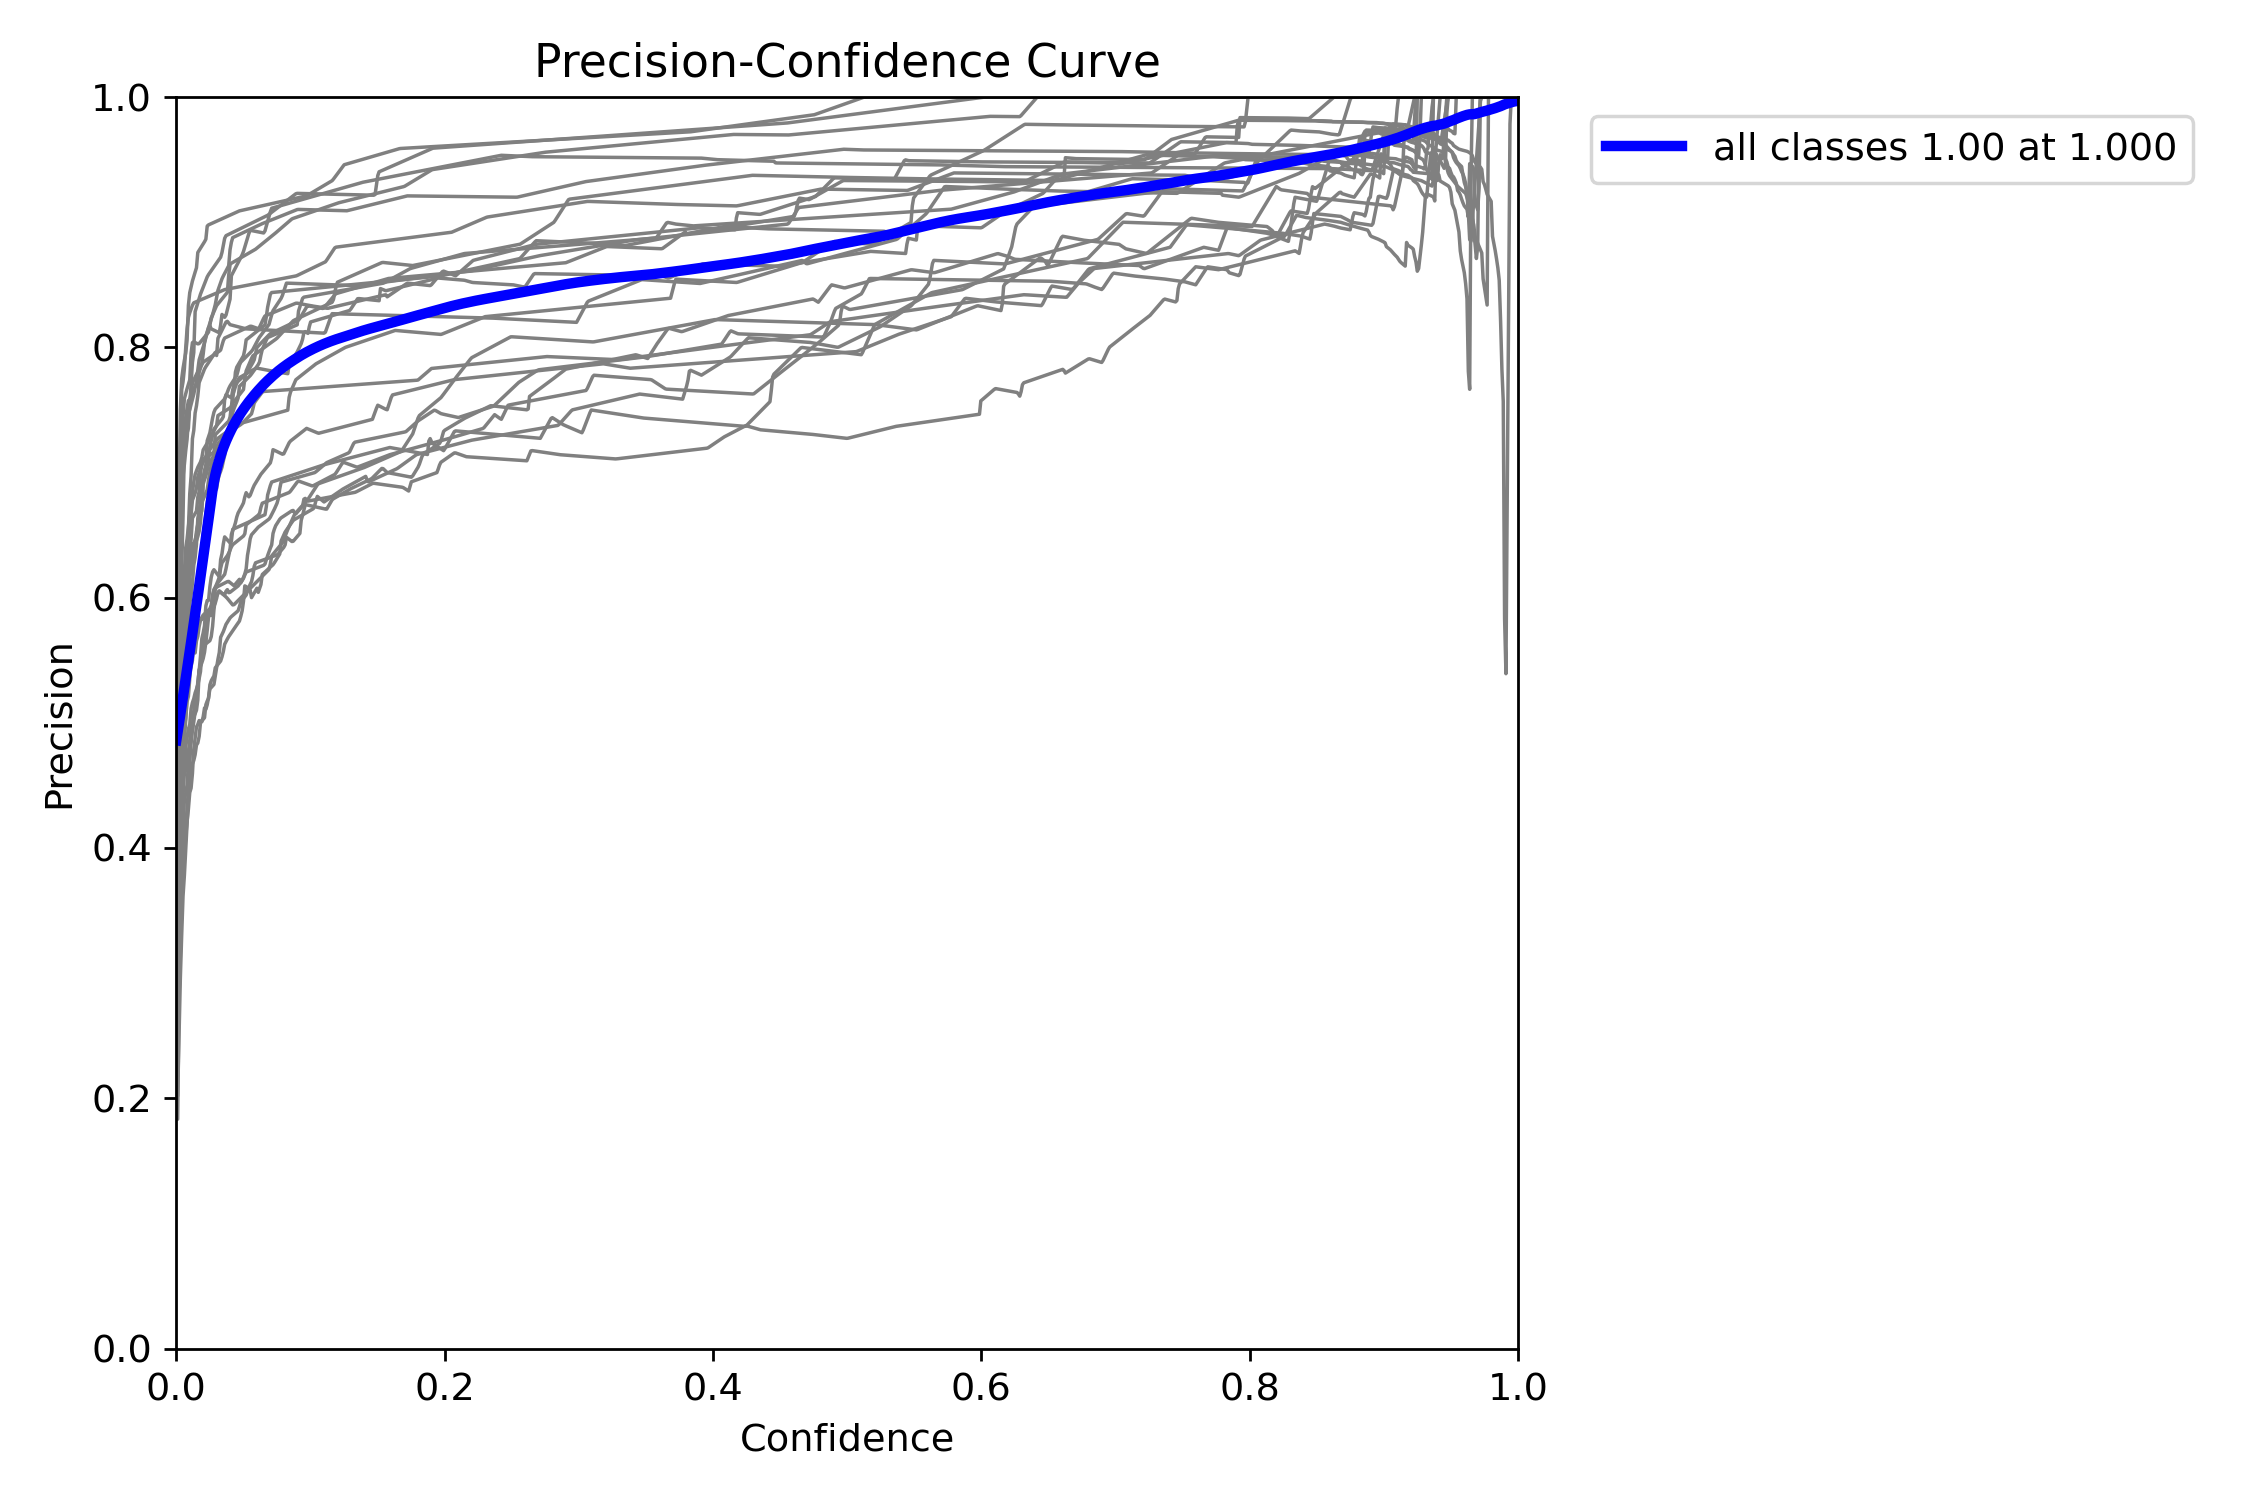

In [ ]:
# Графік залежності точності від впевненості *(Orecision-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/P_curve.png', width =600)

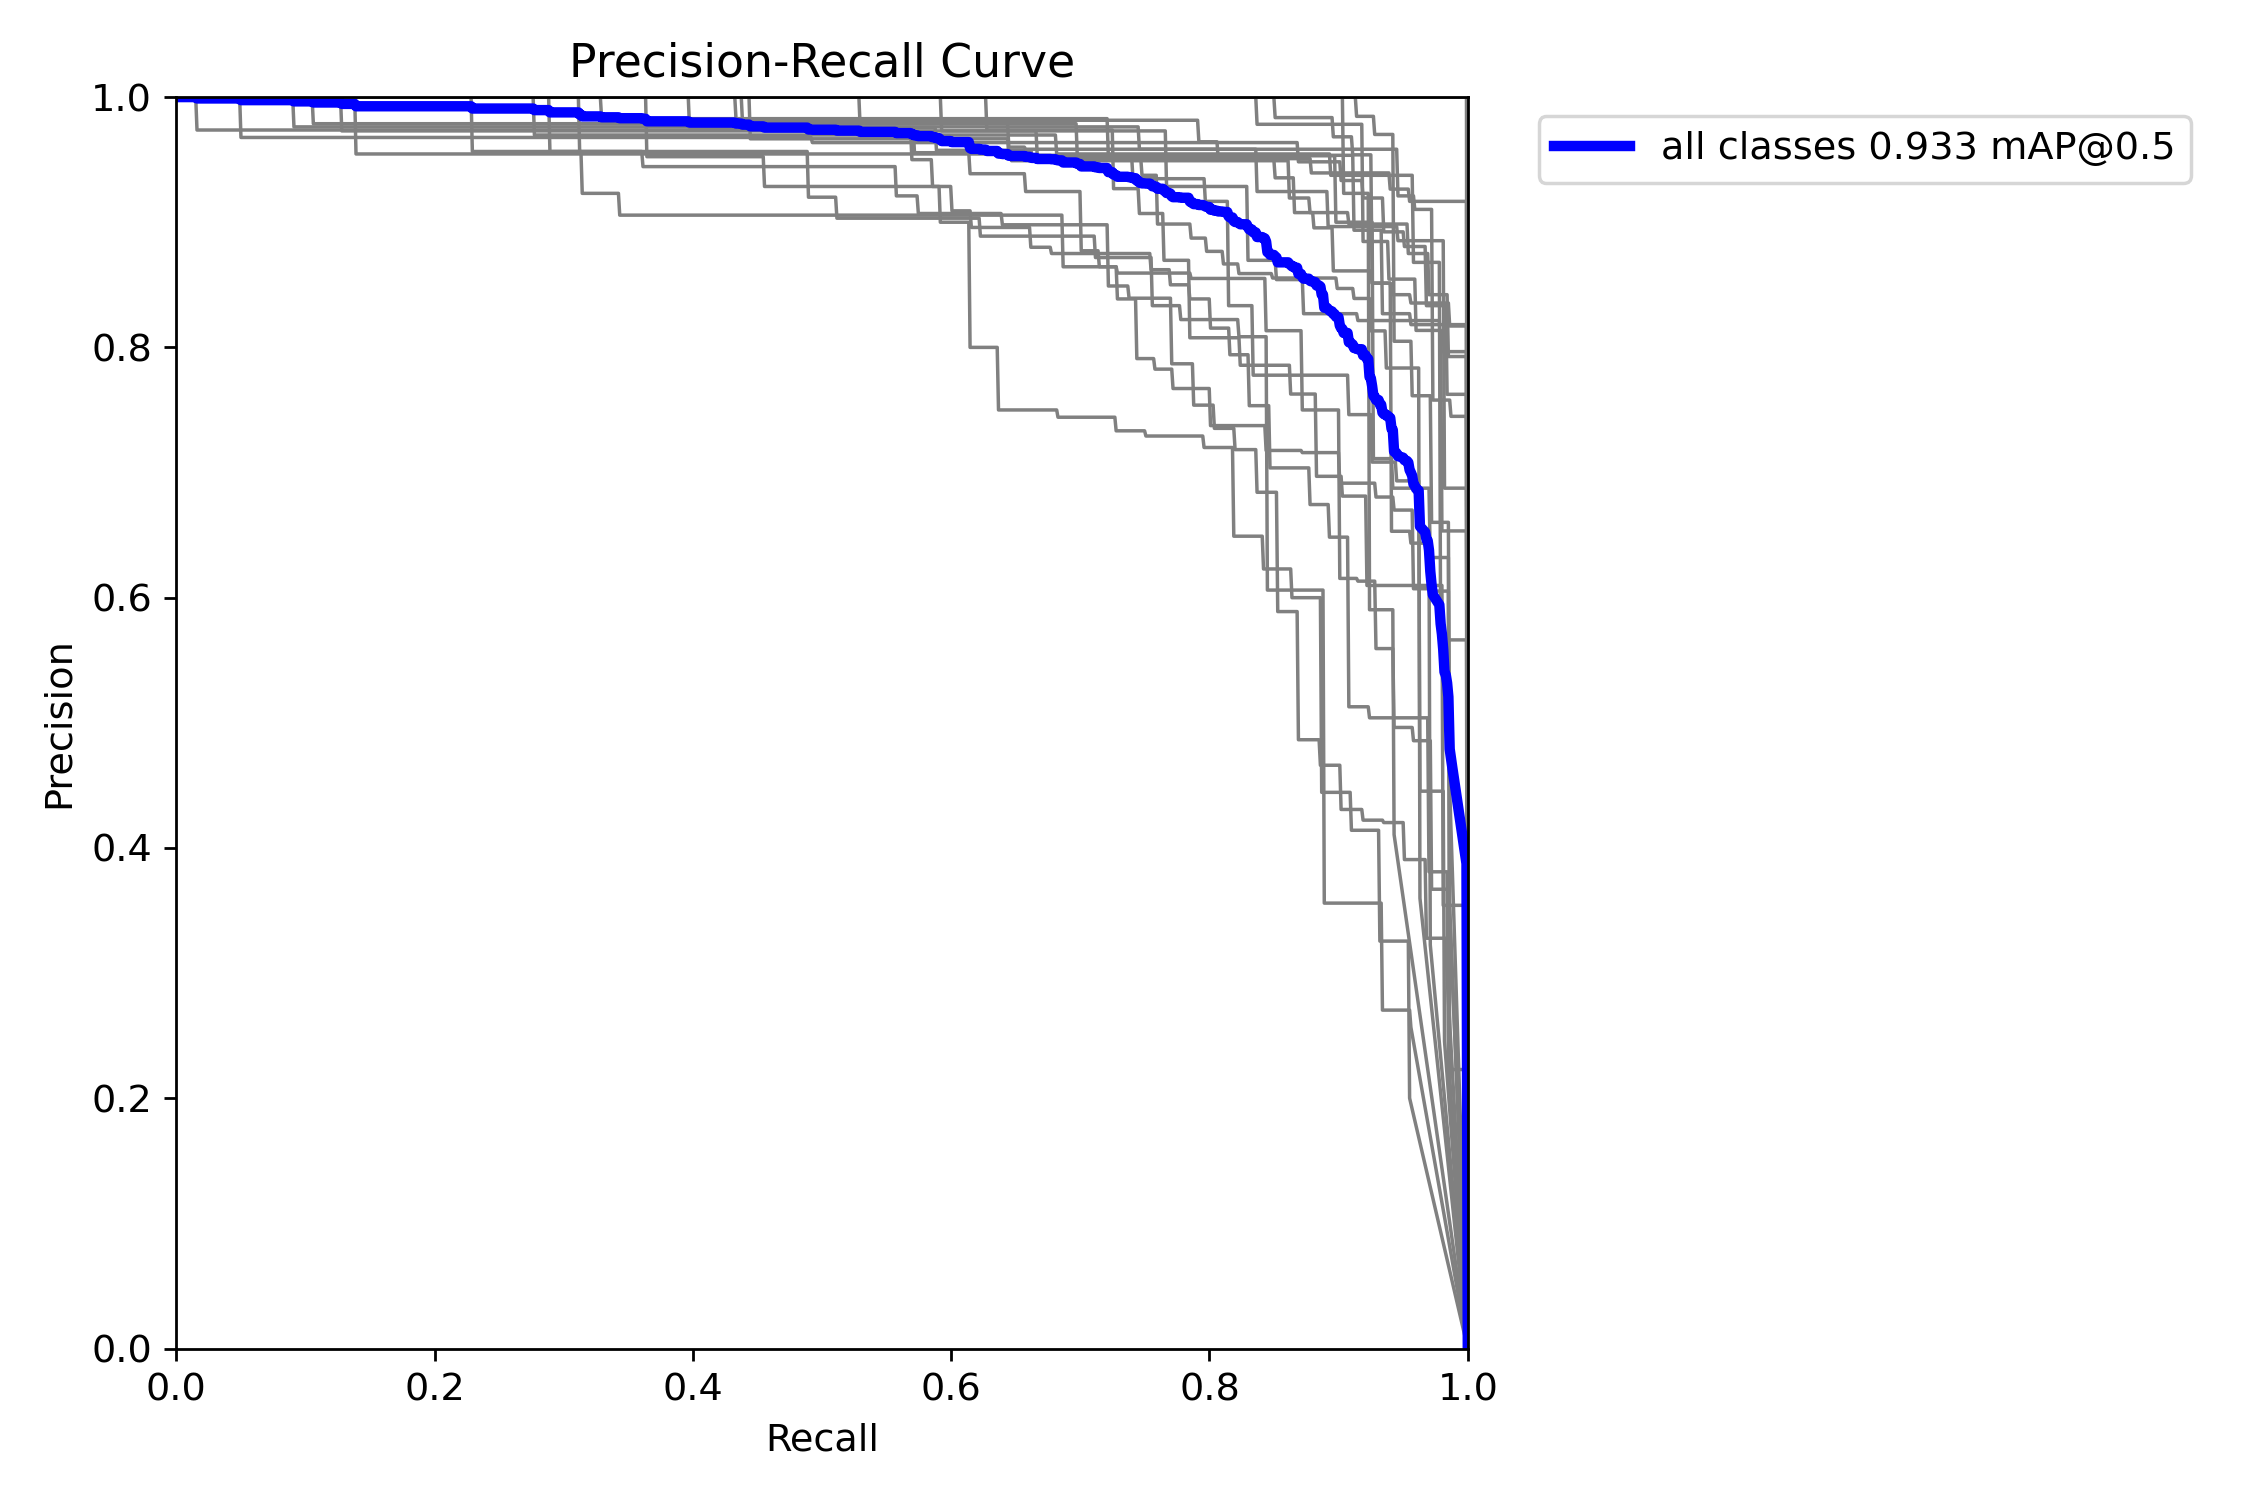

In [ ]:
# Графік залежності точності від повноти (Precision-Recall Curve)
IPyImage (filename = f'/content/runs/detect/train_result/PR_curve.png', width =600)

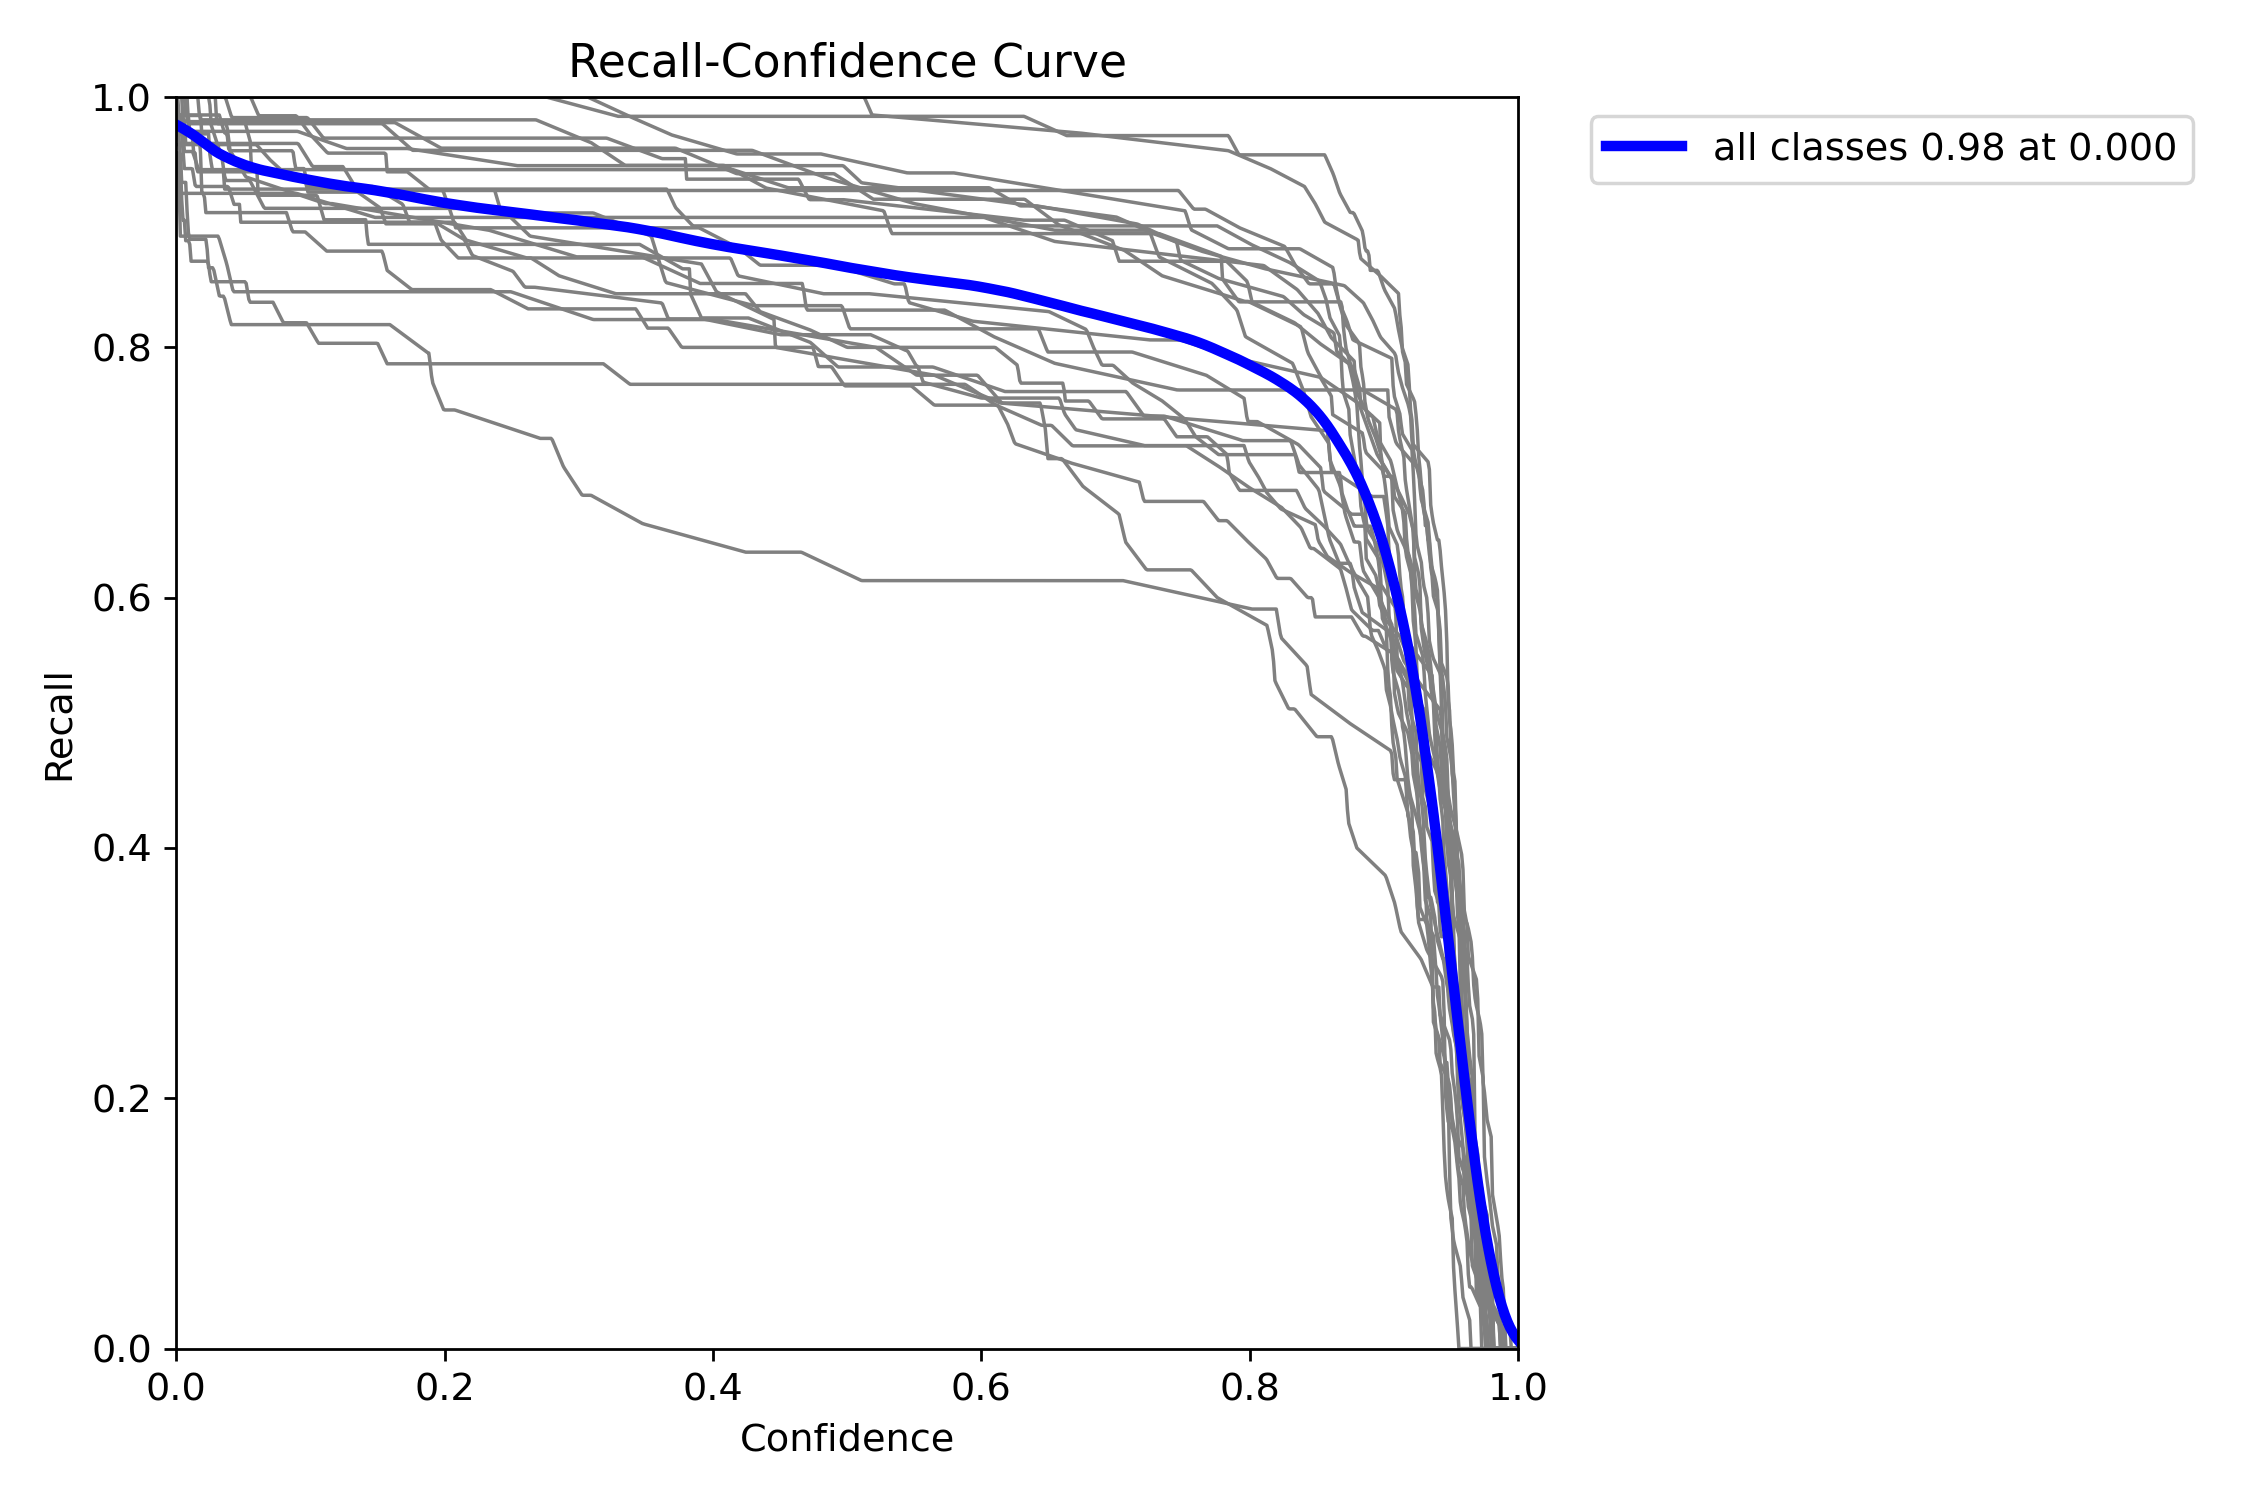

In [ ]:
# Графік залежності повноти від впевненості (Recall-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/R_curve.png', width =600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Вкажи шлях до вихідної папки
source_folder = "/content/runs"

# Вкажи шлях до папки на Google Drive
destination_folder = "/content/drive/MyDrive/ITVR_Coursework/yolo11m (25 epochs, 16 im batch)"

# Копіюємо папку, дозволяючи перезаписувати існуючі файли
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print("Папку успішно скопійовано!")

Папку успішно скопійовано!


In [ ]:
import shutil
from google.colab import files

# Вкажи шлях до папки, яку потрібно завантажити
folder_path = "/content/runs"

# Стиснемо папку у формат ZIP
shutil.make_archive("yolo11m (25 epochs, 16 im batch)", "zip", folder_path)

# Завантажимо архів
files.download("yolo11m (25 epochs, 16 im batch).zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>